# Classificação de vídeos com PYTHON - PARTE 1

### Vídeos são um conjunto de imagens (frames) organizadas em uma determinada ordem.

***

## 1. Reconhecimento de imagens com KERAS

### O dataset utilizado neste notebook foi o [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist).

In [1]:
# Importação de bibliotecas;

import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#!pip install tensorflow
#!pip install matplotlib

In [3]:
# Acessando aos dados:

dataset = keras.datasets.fashion_mnist
((imagens_treino, id_treino), (imagens_teste, id_teste)) = dataset.load_data()     # Load_data: função do keras. Devolve 2 tuplas contendo os dados de treino e os dados de teste.

In [4]:
# Investigação preliminar das imagens:

imagens_treino.shape

(60000, 28, 28)

#### Note que são 60000 imagens descritas em 28 linhas e 28 colunas (28x28)

In [5]:
imagens_teste.shape

(10000, 28, 28)

#### São, no total, 70mil imagens de dimensões 28x28 pixels.

In [6]:
# Investigação preliminar das informações:

print(len(id_treino))
print(len(id_teste))

60000
10000


In [7]:
# Verificando as identificações disponíveis:

np.unique(id_treino)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
total_ids = 10

#### De acordo com a documentação do dataset, as identificações das roupas/calçados (id_treino e id_teste) estão dispostas da seguinte forma:

<img src='data/labels.png'>

In [9]:
# Traduzindo os labels:

labels = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

Text(0.5, 1.0, '9')

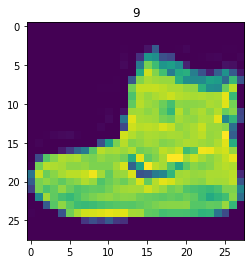

In [10]:
# Visualizando uma imagem (matplotlib):

plt.imshow(imagens_treino[0])
plt.title(id_treino[0])

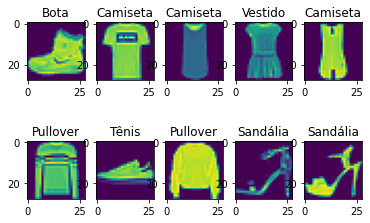

In [11]:
# Visualizando 10 imagens:

for imagem in range(10):
    
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(labels[id_treino[imagem]])

***

### O modelo terá 3 etapas que acontecerão em sequência. São elas:

* Entrada
* Processamento
* Saída

***

In [36]:
# Camada 0 (entrada): Achatamento dos dados. Uma imagem com dimensões 28x28 (array de 2 dimensões) será transformada num array de 1 dimensão.

# Camada 1 (processamento): É uma camada mais densa. Parâmetro da função Dense: número de funções (aleatório - são necessários testes para saber o melhor). 
#                           Preferencialmente número par. Segundo parâmetro: activation, que define como essas funções da camada 1 se comunicarão com as da camada 0.
#                           Dentro do tensorflow,na parte de redes neurais (Neural Networks), existe uma função chamada relu, que tem sido usada nessas ocasiões.

# Camada 2 (saída): Primeiro parâmetro é o número de classificações do nosso modelo (10).


imagens_treino = imagens_treino/float(255)  # Ver NOTA 1 (normalização)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),   # entrada
    keras.layers.Dense(256, activation = tensorflow.nn.relu),        # processamento
    keras.layers.Dropout(0.2),                                       # Ver NOTA 4 (inserir essa camada somente se necessário)
    #keras.layers.Dense(128, activation = tensorflow.nn.relu),       # Camada intermediária. Ver NOTA 2.
    #keras.layers.Dense(64, activation = tensorflow.nn.relu),        # Camada intermediária 2. Não deu certo, a perda (loss) aumentou.
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)       # saída
])

### Sobre a função ReLu (Unidade Linear Retificada):

* É uma função não-linear.
* Valores de entrada negativos são convertidos para valores de saída iguais a zero.
* Valores de entrada positivos dão origem a valores de saída positivos.

### Sobre a função Softmax:

* Calcula as probabilidades de uma determinada classificação estar correta. Retornará um valor entre 0 e 1.

### O modelo acima é considerado um modelo de 2 camadas.

In [37]:
# Compilação do modelo:

modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Para saber o quanto o modelo está acertando, parâmetro 'metrics'. Obs. Entre colchetes porque pode ser mais de 1 métrica.

In [38]:
# Treinamento do modelo:

historico = modelo.fit(imagens_treino, id_treino, epochs = 4, validation_split = 0.2)
historico

Epoch 1/4
1500/1500 [==============================] - 2s 1ms/step - loss: 1.1072 - accuracy: 0.6531 - val_loss: 0.7110 - val_accuracy: 0.7516
Epoch 2/4
1500/1500 [==============================] - 1s 976us/step - loss: 0.6656 - accuracy: 0.7597 - val_loss: 0.5936 - val_accuracy: 0.7824
Epoch 3/4
1500/1500 [==============================] - 1s 995us/step - loss: 0.5865 - accuracy: 0.7884 - val_loss: 0.5430 - val_accuracy: 0.8040
Epoch 4/4
1500/1500 [==============================] - 1s 990us/step - loss: 0.5428 - accuracy: 0.8042 - val_loss: 0.5102 - val_accuracy: 0.8192


#### A perda nesse modelo está em 4.0862. Situação ideal: quanto mais perto de zero, melhor. (1 vez que treinou)

#### Perda de 0.4839 (Quando normalizamos)

#### Podemos tentar trainar o modelo mais vezes, para tentar diminuir a perda. Parâmetro "epochs". Padrão é treinar 1x. (Perda passou para 0.2688, com epochs = 5)

#### Fazendo agora epochs = 10. (perda passou para: 0.1633)

#### Ajuste no modelo (NOTA 4): valores mudaram novamente.

***

### NOTA 1: 

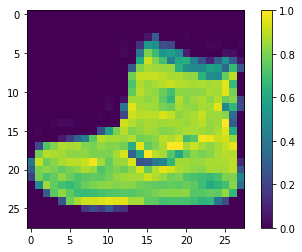

In [15]:
# Buscando mais informações sobre as cores das imagens:

plt.imshow(imagens_treino[0])
plt.colorbar()

#### Veja que a escala de cores varia de 0 a um pouco mais de 250 (aproximadamente 255 pixels). 

#### Faremos com que essa escala varie entre 0 e 1. (Processo chamado de normalização)

***

### NOTA 2:

#### Criação de uma camada intermediária: Captação de detalhes que podem ter sido perdidos. Parâmetro  128: aleatório. Fazer experimentação.
#### Caso o erro (loss) não diminua, excluir/comentar camadas intermediárias e reiniciar o kernel.

***

## Testando o modelo:

***

In [16]:
testes = modelo.predict(imagens_teste)

In [17]:
# Visualizando o primeiro elemento de testes:

testes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Note que o predict retornou um array com floats, ou seja, há informações depois da vírgula que não temos acesso.
#### Para sabermos o resultado, se o teste deu certo, precisamos do numpy, função argmax (argumento máximo), com a qual selecionaremos o argumento de maior valor:

In [18]:
# Verificando a previsão do modelo:

print('Resultado do teste para a imagem de teste 0: ', np.argmax(testes[0]))
print('Verificando se a descrição da imagem teste 0 é essa mesmo: ', id_teste[0])

Resultado do teste para a imagem de teste 0:  9
Verificando se a descrição da imagem teste 0 é essa mesmo:  9


In [19]:
# Verificando mais um item:

print('Resultado do teste para a imagem de teste 0: ', np.argmax(testes[1]))
print('Verificando se a descrição da imagem teste 0 é essa mesmo: ', id_teste[1])

Resultado do teste para a imagem de teste 0:  2
Verificando se a descrição da imagem teste 0 é essa mesmo:  2


### Avaliar quanto o modelo acertou/errou:

In [20]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, id_teste)
print(perda_teste, acuracia_teste)

313/313 [==============================] - 0s 918us/step - loss: 64.8478 - accuracy: 0.8438
64.84780883789062 0.8438000082969666


***

## NOTA 3:

#### Note que a perda está muito alta e a acurácia, muito baixa. 

#### No momento do treinamento do modelo, separamos em dados de treino e dados de teste. Podemos, também, separar dados para a VALIDAÇÃO do modelo.

In [23]:
# Analisando os resultados de 'historico':

historico.history # Retorna valores dos parâmetros por época

{'loss': [0.27296316623687744,
  0.26026394963264465,
  0.24825090169906616,
  0.2389625906944275,
  0.22710631787776947],
 'accuracy': [0.8987500071525574,
  0.9034791588783264,
  0.906624972820282,
  0.909166693687439,
  0.9133333563804626],
 'val_loss': [0.3225850760936737,
  0.31740298867225647,
  0.3415879011154175,
  0.3147287964820862,
  0.3113340139389038],
 'val_accuracy': [0.8844166398048401,
  0.8863333463668823,
  0.8805000185966492,
  0.8889166712760925,
  0.893833339214325]}

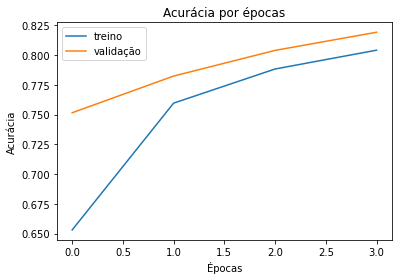

In [39]:
# Plotando um gráfico das acurácias (acurácia de treino e acurácia de validação):

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino', 'validação'])

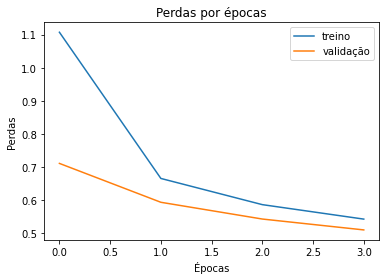

In [40]:
# Plotando um gráfico das perdas (perdas de treino e perdas de validação):

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['treino', 'validação'])

#### Note que, com 10 épocas de treinamento, os valores de treino estão bons até demais, chamado overfitting. Tão bons que os dados de validação estão ruins perto dos de treino.

#### Bom método de identificação do overfitting: Linhas de treino indo muito bem e linhas de validação indo mal.

<img src=images/overfitting.png>

***

## NOTA 4:

#### Para ajustar o overfitting, observar os gráficos e perceber onde o comportamento do gráfico de validação é o esperado. No nosso caso, ajustar o parâmetro 'epochs' para 4 não ajudou.

#### A próxima tentativa de ajuste do overfitting é mexer nas camadas do modelo. Das 256 células que estipulamos, algumas podem estar "adormecidas". Incluímos, então, uma linha para retirar, aproximadamente, 20\% dessas células. Deu certo. (É um tipo de normalização)

#### A quantidade de vezes que a célula é executada interfere nos gráficos.

In [47]:
# Salvando o modelo:
# .hr: extensão para grandes volumes de dados.

modelo.save('modelo.h5')

# modelo_epochs5_nos3.h5 (quando houver mais de 1 modelo, renomeá-lo com o numero de épocas e o numero de nós (camadas))

In [43]:
# Carregando o modelo salvo:

from tensorflow.keras.models import load_model

modelo_salvo = load_model('modelo.h5')

In [46]:
# Testando o modelo salvo:

testes_salvo = modelo_salvo.predict(imagens_teste)
print('Resultados modelo salvo: ', np.argmax(testes_salvo[1]))
print('Verificando se a descrição da imagem teste 1 é essa mesmo: ', id_teste[1])

Resultados modelo salvo:  2
Verificando se a descrição da imagem teste 1 é essa mesmo:  2
